In [27]:
import json
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
file_1 = "/Users/alyssanguyen/Desktop/IRLE_scraping/csv_files/processed_prices_ubereats_ca_fullserv_03252024.csv"
file_2 = "/Users/alyssanguyen/Desktop/IRLE_scraping/csv_files/final_processed_prices_ubereats_ca_fullserv_05142024.csv"
pre = pd.read_csv(file_1)
post = pd.read_csv(file_2)

file_path_2 = "/Users/alyssanguyen/Desktop/IRLE_scraping/csv_files/uszips.csv"
ca_zip_count = pd.read_csv(file_path_2)

In [170]:
pre = pre[pre['state'] == 'ca']
post = post[post['state'] == 'ca']

In [171]:
common_addresses = pd.merge(pre[['restaurant_location']], post[['restaurant_location']], on='restaurant_location', how='inner')

# Filter both DataFrames to include only the matched addresses
pre_filtered = pre[pre['restaurant_location'].isin(common_addresses['restaurant_location'])]
post_filtered = post[post['restaurant_location'].isin(common_addresses['restaurant_location'])]


In [172]:
# counties = [
#     "baldwin", "jefferson", "madison", "mobile", "chatham", "cobb", "dekalb", "fulton", "gwinnett",
#     "ada", "hamilton", "lake", "marion", "polk", "johnson", "sedgwick", "fayette", "east baton rouge", 
#     "lafayette", "orleans", "st. tammany", "harrison", "hillsborough", "rockingham", "buncombe", 
#     "cumberland", "durham", "forsyth", "guilford", "mecklenburg", "new hanover", "wake", "cleveland", 
#     "oklahoma", "tulsa", "allegheny", "berks", "bucks", "chester", "delaware", "lancaster", "lehigh", 
#     "montgomery", "philadelphia", "westmoreland", "york", "beaufort", "charleston", "greenville", "horry", 
#     "lexington", "richland", "spartanburg", "davidson", "knox", "rutherford", "sevier", "shelby", 
#     "williamson", "bell", "bexar", "brazoria", "brazos", "cameron", "collin", "dallas", "denton", 
#     "el paso", "fort bend", "galveston", "harris", "hidalgo", "lubbock", "mclennan", "nueces", "tarrant", 
#     "travis", "davis", "salt lake", "utah", "brown", "dane", "milwaukee", "waukesha"
# ]

counties = [
    "alameda",
    "contra costa",
    "fresno",
    "kern",
    "los angeles",
    "marin",
    "monterey",
    "orange",
    "placer",
    "riverside",
    "sacramento",
    "san bernardino",
    "san diego",
    "san francisco",
    "san joaquin",
    "san luis obispo",
    "san mateo",
    "santa barbara",
    "santa clara",
    "santa cruz",
    "solano",
    "sonoma",
    "stanislaus",
    "tulare",
    "ventura"
]


# Preprocess county_name column
pre_filtered = pre_filtered.copy()
post_filtered = post_filtered.copy()

pre_filtered['county_name'] = pre_filtered['county_name'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
post_filtered['county_name'] = post_filtered['county_name'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)


# Filter the DataFrame
pre_filtered = pre_filtered[pre_filtered['county_name'].isin(counties)]
post_filtered = post_filtered[post_filtered['county_name'].isin(counties)]

In [173]:
len(counties)

25

In [174]:
common_addresses = pd.merge(pre_filtered[['restaurant_location']], post_filtered[['restaurant_location']], on='restaurant_location', how='inner')

# Filter both DataFrames to include only the matched addresses
pre_filtered = pre_filtered[pre_filtered['restaurant_location'].isin(common_addresses['restaurant_location'])]
post_filtered = post_filtered[post_filtered['restaurant_location'].isin(common_addresses['restaurant_location'])]



In [175]:
def mean_non_zero(x):
    return np.mean(x[x != 0]) if np.any(x != 0) else 0

def median_non_zero(x):
    return np.median(x[x != 0]) if np.any(x != 0) else 0

def std_non_zero(x):
    return np.std(x[x != 0]) if np.any(x != 0) else 0

In [176]:
pre_filtered.drop(pre_filtered[pre_filtered['restaurant_name'] == 'Panera Bread'].index, inplace=True)
post_filtered.drop(post_filtered[post_filtered['restaurant_name'] == 'Panera Bread'].index, inplace=True)


In [179]:
num_unique_restaurants = len(pre_filtered['restaurant_name'].unique())
num_unique_counties = len(pre_filtered['county_name'].unique())
num_unique_locations = len(pre_filtered['restaurant_location'].unique())
num_unique_states = len(pre_filtered['state'].unique())


print(f"Number of unique restaurant names: {num_unique_restaurants}")
print(f"Number of unique counties: {num_unique_counties}")
print(f"Number of unique restaurant locations: {num_unique_locations}")
print(f"Number of unique restaurant states: {num_unique_states}")



hamburger_mean = mean_non_zero(post_filtered['hamburger'])
cheeseburger_mean = mean_non_zero(post_filtered['cheeseburger'])
specialty_mean = mean_non_zero(post_filtered['specialty_item'])

print(f"Mean (non-zero) of Hamburger: {hamburger_mean}")
print(f"Mean (non-zero) of Cheeseburger: {cheeseburger_mean}")
print(f"Mean (non-zero) of Specialty: {specialty_mean}")

Number of unique restaurant names: 6
Number of unique counties: 25
Number of unique restaurant locations: 364
Number of unique restaurant states: 1
Mean (non-zero) of Hamburger: 15.75981132075473
Mean (non-zero) of Cheeseburger: 15.350413223140492
Mean (non-zero) of Specialty: nan


In [180]:
pre_filtered = pre_filtered.copy()
post_filtered = post_filtered.copy()


pre_filtered['time_period'] = 'pre-policy'
post_filtered['time_period'] = 'post-policy'

combined = pd.concat([pre_filtered, post_filtered])


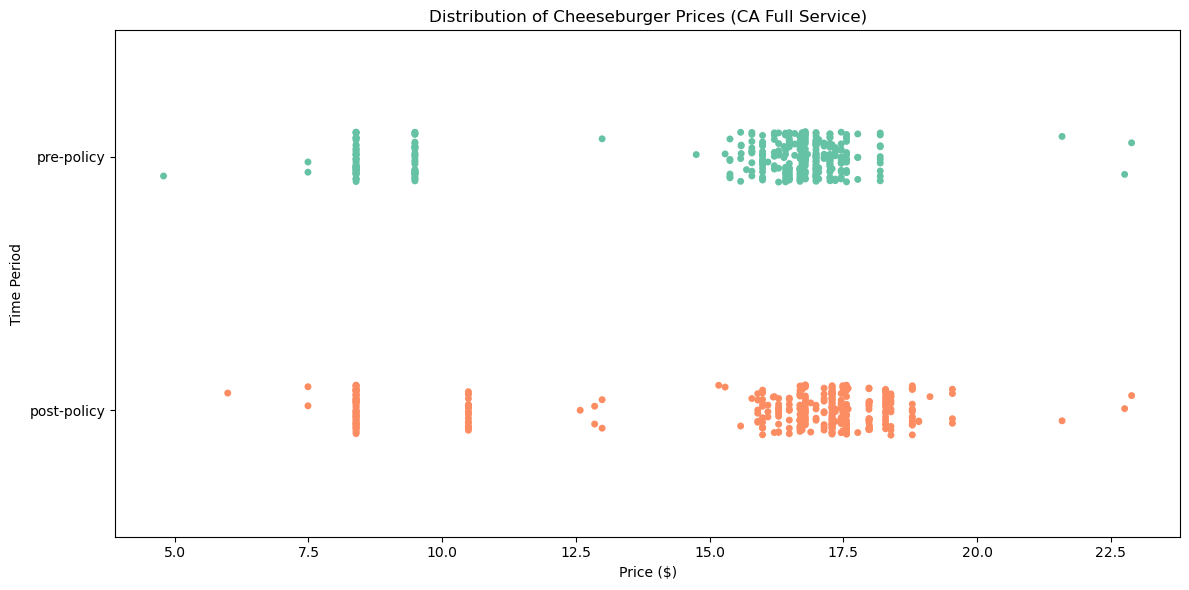

In [184]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='cheeseburger', y='time_period', data=combined, palette='Set2')
plt.xlabel('Price ($)')
plt.ylabel('Time Period')
plt.title('Distribution of Cheeseburger Prices (CA Full Service)')
plt.tight_layout()  # Ensures labels are not cut off when saving
plt.savefig('/Users/alyssanguyen/Desktop/IRLE_scraping/visualizations/cheeseburger_ca_fullserv.png')  # Save as PNG
plt.show()

In [92]:
#Merging Hardees with Carls Jr 

pre_filtered['restaurant_name'] = pre_filtered['restaurant_name'].replace('Hardees', 'Carls Jr')
post_filtered['restaurant_name'] = post_filtered['restaurant_name'].replace('Hardees', 'Carls Jr')


In [185]:
post_filtered['restaurant_name'].unique()

array(['Outback Steakhouse', 'Red Robin', 'Denny', 'Applebee',
       'Buffalo Wild Wings', 'TGI Fridays'], dtype=object)

In [148]:
pre_filtered['restaurant_name'].value_counts().head(9)

Nation's Giant Hamburgers      22
Burger Lounge                  22
Super Duper Burgers            10
Gott's Roadside                 5
Roam Artisan Burgers            5
Barney's Gourmet Hamburgers     5
Super Burger                    3
R Burgers                       3
Burger Station                  2
Name: restaurant_name, dtype: int64

sanity check

In [186]:
for restaurant in pre_filtered['restaurant_name'].unique():
    pre_df = pre_filtered[pre_filtered['restaurant_name'] == restaurant]
    post_df = post_filtered[post_filtered['restaurant_name'] == restaurant]
    
    
    num_unique_counties = len(pre_df['county_name'].unique())
    num_unique_locations = len(pre_df['restaurant_location'].unique())
    num_unique_states = len(pre_df['state'].unique())

    print(f"Summary Stats for: {restaurant}")
    print(f"Number of unique counties: {num_unique_counties}")
    print(f"Number of unique restaurant locations: {num_unique_locations}")
    print(f"Number of unique restaurant states: {num_unique_states}")

    hamburger_mean = mean_non_zero(pre_df['hamburger'])
    cheeseburger_mean = mean_non_zero(pre_df['cheeseburger'])
    specialty_mean = mean_non_zero(pre_df['specialty_item'])


    print("Pre-Policy Prices")
    print(f"Mean (non-zero) of Hamburger: {hamburger_mean}")
    print(f"Mean (non-zero) of Cheeseburger: {cheeseburger_mean}")
    print(f"Mean (non-zero) of Specialty: {specialty_mean}")


    hamburger_mean = mean_non_zero(post_df['hamburger'])
    cheeseburger_mean = mean_non_zero(post_df['cheeseburger'])
    specialty_mean = mean_non_zero(post_df['specialty_item'])


    print("Post-Policy Prices")
    print(f"Mean (non-zero) of Hamburger: {hamburger_mean}")
    print(f"Mean (non-zero) of Cheeseburger: {cheeseburger_mean}")
    print(f"Mean (non-zero) of Specialty: {specialty_mean}")
    
    

Summary Stats for: Outback Steakhouse
Number of unique counties: 13
Number of unique restaurant locations: 36
Number of unique restaurant states: 1
Pre-Policy Prices
Mean (non-zero) of Hamburger: 15.90428571428572
Mean (non-zero) of Cheeseburger: 9.559444444444448
Mean (non-zero) of Specialty: nan
Post-Policy Prices
Mean (non-zero) of Hamburger: 14.898571428571433
Mean (non-zero) of Cheeseburger: 9.776111111111113
Mean (non-zero) of Specialty: nan
Summary Stats for: Red Robin
Number of unique counties: 15
Number of unique restaurant locations: 47
Number of unique restaurant states: 1
Pre-Policy Prices
Mean (non-zero) of Hamburger: nan
Mean (non-zero) of Cheeseburger: 8.389999999999992
Mean (non-zero) of Specialty: nan
Post-Policy Prices
Mean (non-zero) of Hamburger: nan
Mean (non-zero) of Cheeseburger: 8.389999999999992
Mean (non-zero) of Specialty: nan
Summary Stats for: Denny
Number of unique counties: 24
Number of unique restaurant locations: 140
Number of unique restaurant states: 

In [50]:
pre_filtered['restaurant_name'].unique()

array(['Outback Steakhouse', 'Buffalo Wild Wings', 'Applebee', 'Denny',
       'Red Robin', 'TGI Fridays'], dtype=object)

In [121]:
agg_dict = {
    'menu_item_price mean_non_zero': mean_non_zero,
    'menu_item_price median_non_zero': mean_non_zero,
    'menu_item_price std_non_zero': mean_non_zero,
    'restaurant_rating mean': mean_non_zero,
    'menu_item count': mean_non_zero,
    'hamburger': mean_non_zero,
    'cheeseburger': mean_non_zero,
    'specialty_item': mean_non_zero,
    'fries': mean_non_zero,
    'combo': mean_non_zero,
    'county_name': 'count'
}

# Perform the groupby and aggregation
result = ca_ff.groupby("restaurant_name").agg(agg_dict)

# Reset index to turn 'restaurant_name' from index to a column
result = result.reset_index()

# Rename the columns to more readable names
result.columns = [
    'Restaurant Name', 
    'Average Menu Item Price', 
    'Median Menu Item Price', 
    'Std Dev Menu Item Price', 
    'Average Restaurant Rating', 
    'Average Menu Item Count', 
    'Average Hamburger Price', 
    'Average Cheeseburger Price', 
    'Average Specialty Item Price', 
    'Average Fries Price', 
    'Average Combo Price', 
    'County Count'
]

result

,Restaurant Name,Average Menu Item Price,Median Menu Item Price,Std Dev Menu Item Price,Average Restaurant Rating,Average Menu Item Count,Average Hamburger Price,Average Cheeseburger Price,Average Specialty Item Price,Average Fries Price,Average Combo Price,County Count
0,Applebee,20.593280,15.296237,20.962820,4.273656,140.387097,13.808602,14.706720,NaN,14.875920,NaN,186
1,Buffalo Wild Wings,7.729876,6.330000,8.967980,4.193636,109.500000,NaN,13.498182,NaN,4.867315,NaN,110
2,Denny,10.023410,8.517061,6.086510,4.223030,147.981818,NaN,13.658405,NaN,5.215333,NaN,165
3,Outback Steakhouse,18.067444,14.071364,12.957996,4.385714,109.324675,14.948533,10.470519,NaN,5.064026,NaN,77
4,Panera Bread,8.875863,7.863333,7.724865,4.653333,184.666667,NaN,NaN,NaN,NaN,NaN,15
5,Red Robin,12.050759,11.203814,7.822556,4.467797,130.644068,NaN,8.345254,NaN,4.543158,NaN,59
6,TGI Fridays,25.089391,16.582069,26.598320,4.179310,179.068966,NaN,13.705862,NaN,3.167931,NaN,29
